# Medical Image Test - Vajira

# 'Medical image v2_2 - Resnet34'

In [5]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [7]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [8]:
PATH = "data/"
sz=224

In [9]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.1, 4)

epoch      trn_loss   val_loss   accuracy                  
    0      0.910239   0.529161   0.8195    
    1      0.709978   0.473088   0.8285                    
    2      0.524099   0.370311   0.8545                    
    3      0.431177   0.381113   0.8505                    



[array([0.38111]), 0.8505]

In [19]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [20]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [21]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [22]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, y_type,is_correct): 
    mult = -1 if (y==y_type)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

In [26]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [27]:
lrf=learn.lr_find()

 41%|████▏     | 26/63 [00:00<00:00, 65.70it/s, loss=8.03]


Our `learn` object contains an attribute `sched` that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

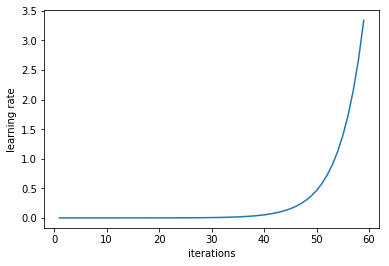

In [28]:
learn.sched.plot_lr()

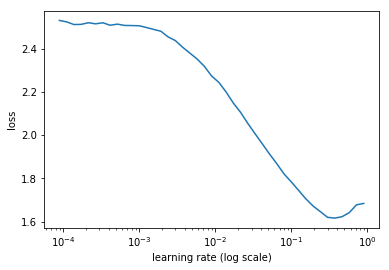

In [29]:
learn.sched.plot()

In [30]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [31]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [32]:
learn.fit(0.1, 4)

epoch      trn_loss   val_loss   accuracy                  
    0      0.969917   0.560213   0.8445    
    1      0.78063    0.493171   0.8375                    
    2      0.549674   0.423697   0.831                     
    3      0.44337    0.407158   0.8465                    



[array([0.40716]), 0.8465]

In [33]:
learn.precompute=False

In [34]:
learn.fit(0.1, 4, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                  
    0      0.42774    0.358302   0.8645    
    1      0.396753   0.337235   0.862                     
    2      0.386578   0.333755   0.866                     
    3      0.373836   0.332848   0.869                     



[array([0.33285]), 0.869]

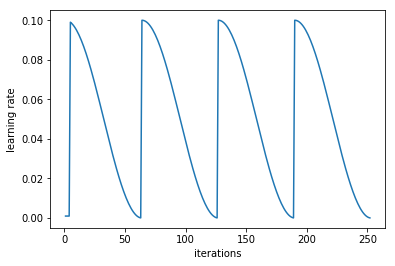

In [35]:
learn.sched.plot_lr()

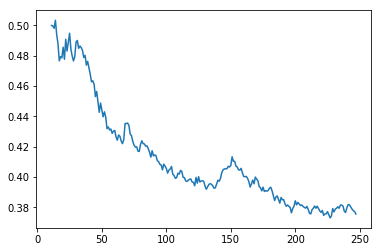

In [36]:
learn.sched.plot_loss()

In [38]:
learn.save('resnet34_v2_2')

In [39]:
learn.load('resnet34_v2_2')

In [40]:
learn.unfreeze()

In [41]:
lrs=np.array([1e-4,1e-3,0.1])

In [42]:
learn.fit(lrs, 4, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.504656   0.344651   0.8565    
    1      0.381076   0.278013   0.881                     
    2      0.295088   0.277779   0.8885                    
    3      0.273207   0.285029   0.889                     
    4      0.23141    0.284445   0.891                     
    5      0.187858   0.276915   0.8925                    
    6      0.159108   0.272116   0.8935                    
    7      0.16739    0.292384   0.892                     
    8      0.155964   0.299439   0.894                     
    9      0.132943   0.300924   0.895                     
    10     0.127056   0.300078   0.8995                    
    11     0.108678   0.295579   0.9015                    
    12     0.091164   0.30427    0.901                      
    13     0.075873   0.314013   0.899                      
    14     0.071805   0.310987   0.902                      



[array([0.31099]), 0.902]

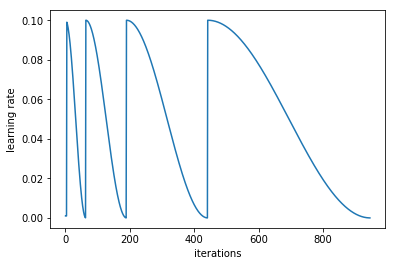

In [43]:
learn.sched.plot_lr()

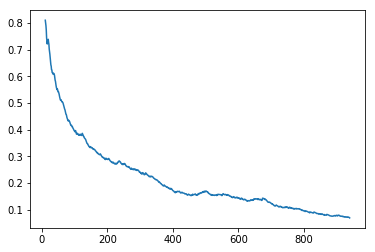

In [44]:
learn.sched.plot_loss()

In [45]:
learn.save('resnet34_v2_2_last')

In [46]:
learn.load('resnet34_v2_2_last')

In [47]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [48]:
accuracy_np(probs, y)

0.922

### Confusion matrix 

In [49]:
preds = np.argmax(probs, axis=1)

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [51]:
plt.rcParams['figure.figsize'] = [15, 10]

[[230  18   0   0   0   0   2   0]
 [ 11 239   0   0   0   0   0   0]
 [  0   0 179   0   1  69   0   1]
 [  0   0   0 248   0   0   2   0]
 [  0   0   0   0 247   0   2   1]
 [  0   0  19   0   0 230   1   0]
 [  2   0   0   4   4   0 233   7]
 [  1   0   1   5   1   0   4 238]]


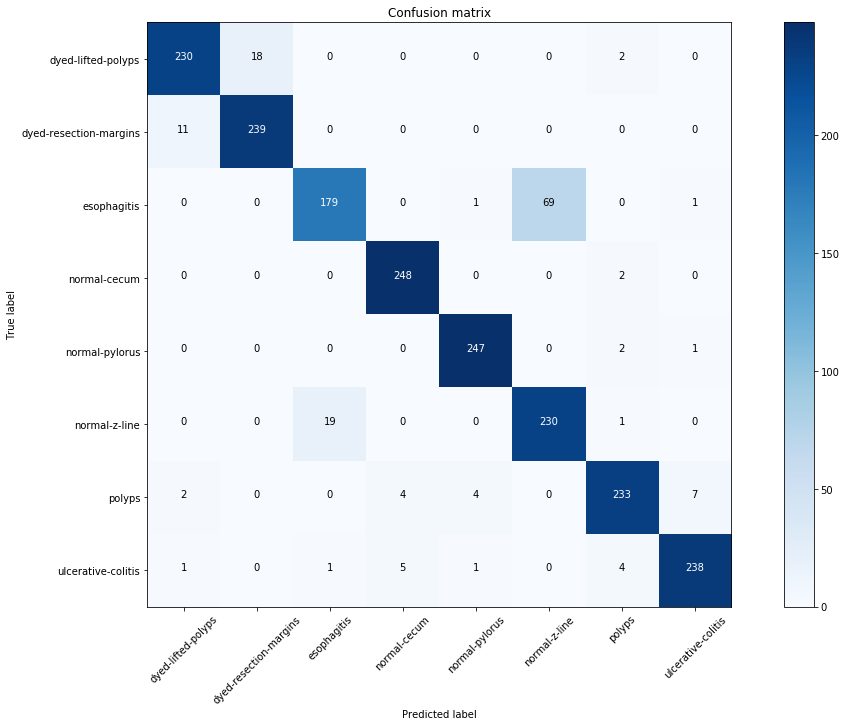

In [52]:
plot_confusion_matrix(cm, data.classes)

## Test data accuracy

In [57]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(PATH, tfms=tfms, val_name='test')

In [ ]:
log_preds_t,y_t = learn.TTA()

 75%|███████▌  | 3/4 [00:23<00:07,  7.84s/it]

In [56]:
probs_t = np.mean(np.exp(log_preds_t),0)
accuracy_np(probs_t, y_t)

0.9165

In [ ]:
preds_t = np.argmax(probs_t, axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_t, preds_t)
plot_confusion_matrix(cm, data.classes)